In [1]:
from functions_untrained_reservoir import *

from reservoirpy.nodes import Reservoir,FORCE,Ridge
from reservoirpy.mat_gen import Initializer
from reservoirpy.observables import spectral_radius

import numpy as np 
import matplotlib.pyplot as plt

# Réseaux de neurones

On cherche ici dans un premier temps à reprdoduire les figures les plus simples de l'article. 

Les mesures de l'article sont effectuées sur 2 réservoirs : 

  - le premier est dit entrainé : on va alors entrainer le réservoir et la sortie
  - le second lui est dit non entrainé : on entraine seulement la sortie
    
 Ce premier script s'intéresse donc à la reproduction de l'entrainement des figures 3, 4 et 5 ainsi qu'aux résultas obtenus sur un réservoir non entrainé.
 
à noter, que la méthode d'entrainement utilisée pour ce script est une méthode dite offline utilisant le noeud Ridge de ReservoirPy. Et qu'un autre script traite de la méthode online pour pouvoir comparer les résultats obtenus.

Données générales 

In [2]:
data = extract_data() #Données d'entrée
transcription = extract_target() #Données d'arrivée 

#Les données suivantes sont utilisés dans les fonctions mais pas dans le script ! 

freq_ent = 6*10**3  #fréquence d'entrée
T_ent = 1/freq_ent  #période d'entrée

freq_out = 10**3 #fréquence de sortie 
T_out = 1/freq_out #période de sortie

ampl_int = 5 #Amplitude d'entrée

Données du réservoir

In [3]:
N = 2100 #Nombre de neurones dans le réservoir
M = 12 #Nombres d'entrées
ridge = 0.01
bias = False
tau = 25*10e-3
dt = 1e-3
lr = dt/tau
sr = 1.0 #spectral radius --> gain ?
g = 1.6 #le gain du réseau ?                             #je comprends pas trop cette donnée. 
connectivity = 0.2 # connectivité entre les neurones (pc dans l'article)
SD = g/np.sqrt(connectivity*N)
mu = 0
I0 = 0 #pendant l'entrainement de la sortie            

Wo = normal(loc=mu,scale = 1/np.sqrt(N))    #Matrice de sortie : Non utilisée


Création de la matrice du réservoir : avec pas d'autapses

In [4]:
W_r.init = Initializer(W_r)

Création de la matrice d'entrée : chaque entrée k est projetée sur le neurone $(k-1)\frac{N}{M} + 1$ jusqu'au neurone $k\frac{N}{M}$ selon une loi normale 

In [5]:
Win = W_in(N,M)

## Première expérience

Test de l'entrainement dans la figure 3 page 8 de l'article, on entraine le réservoir 30 fois, soit 3 entrées différentes pour les 10 chiffres

Création des données d'entrée

In [6]:
X_input = []
X_target = []
for indS in [1] : 
    for indU in range(1,4):
        for indD in range(10):
            X_input.append(np.transpose(formatage_cocleogram(indS, indU, indD,data)))
            X_target.append(target_xyz(indS, indU, indD,data))
            

Création du réservoir offline

In [7]:
reservoir_offline, readout_offline = Reservoir(units = N,
                                               lr = lr,
                                               sr=sr,
                                               W=W_r.init,
                                               Win=Win,
                                               equation="external",
                                               input_bias=bias,
                                               noise_rc = I0), Ridge(ridge = ridge)
esn_offline = reservoir_offline >> readout_offline

Entrainement du réservoir

In [8]:
#Entrainement réservoir
for j in range(1):
    esn_offline.fit(X_input,X_target,stateful=False)
    print(j)


Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 52it [00:00, 519.54it/s]                                                                              
Running Model-0: 104it [00:00, 477.28it/s]
Running Model-0: 154it [00:00, 485.50it/s]
Running Model-0: 203it [00:00, 478.44it/s]
Running Model-0: 251it [00:00, 457.75it/s]
Running Model-0: 304it [00:00, 479.02it/s]
Running Model-0: 353it [00:00, 479.39it/s]
Running Model-0: 402it [00:00, 477.22it/s]
Running Model-0: 450it [00:00, 472.76it/s]
Running Model-0: 499it [00:01, 477.08it/s]
Running Model-0: 547it [00:01, 473.41it/s]
Running Model-0: 595it [00:01, 463.77it/s]
Running Model-0: 650it [00:01, 488.54it/s]
Running Model-0: 702it [00:01, 495.43it/s]
Running Model-0: 762it [00:01, 525.16it/s]
Running Model-0: 818it [00:01, 533.06it/s]
Running Model-0: 877it [00:01, 548.50it/s]
Running Model-0: 937it [00:01, 562.14it/s]
Running Model-0: 997it [00:01

Running Model-0: 1119it [00:01, 817.37it/s]
Running Model-0: 1203it [00:01, 805.03it/s]
Running Model-0: 1301it [00:01, 818.85it/s]
Running Model-0: 1398it [00:01, 826.37it/s]
Running Model-0: 1481it [00:01, 822.48it/s]
Running Model-0: 1568it [00:01, 826.10it/s]
Running Model-0: 1704it [00:02, 819.74it/s]
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 80it [00:00, 779.47it/s]                                                                              
Running Model-0: 165it [00:00, 807.17it/s]
Running Model-0: 261it [00:00, 821.56it/s]
Running Model-0: 344it [00:00, 817.75it/s]
Running Model-0: 428it [00:00, 816.21it/s]
Running Model-0: 516it [00:00, 820.96it/s]
Running Model-0: 603it [00:00, 826.99it/s]
Running Model-0: 694it [00:00, 812.82it/s]
Running Model-0: 776it [00:00, 771.53it/s]
Running Model-0: 857it [00:01, 749.26it/s]
Running Model-0: 941it [00:01, 749.48it/s]
Running Model-0: 1038i

Running Model-0: 1758it [00:02, 763.11it/s]
Running Model-0: 1886it [00:02, 732.89it/s]
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 79it [00:00, 750.64it/s]                                                                              
Running Model-0: 155it [00:00, 699.63it/s]
Running Model-0: 226it [00:00, 644.44it/s]
Running Model-0: 291it [00:00, 632.81it/s]
Running Model-0: 355it [00:00, 618.84it/s]
Running Model-0: 422it [00:00, 630.94it/s]
Running Model-0: 492it [00:00, 637.77it/s]
Running Model-0: 556it [00:00, 628.63it/s]
Running Model-0: 619it [00:00, 621.42it/s]
Running Model-0: 682it [00:01, 613.82it/s]
Running Model-0: 744it [00:01, 609.52it/s]
Running Model-0: 805it [00:01, 608.65it/s]
Running Model-0: 878it [00:01, 625.55it/s]
Running Model-0: 950it [00:01, 636.31it/s]
Running Model-0: 1014it [00:01, 629.95it/s]
Running Model-0: 1077it [00:01, 620.38it/s]
Running Model-0: 1140it [

Fitting node Ridge-0...
0


Récupération des poids de sorties 

14.276439886084585


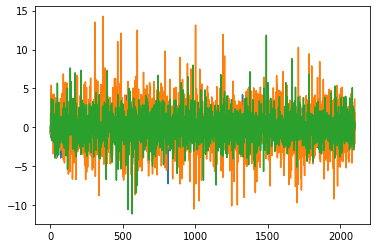

In [9]:
poids_sortie = readout_offline.get_param("Wout")
plt.plot(poids_sortie)
print(np.max(poids_sortie))

### TEST 1 :

Sur des données d'entrainements :

   - le premier graphique est le détail des activités du réservoir pour un chiffre donné.
    
   - le second, c'est la sortie du réservoir pour les 10 chiffres d'un sujet donné et d'une entrée.





###### 1 chiffre

In [10]:
#Test du réservoir
indS,indU,indD = 1,3,6
X_test = np.transpose(formatage_cocleogram(indS,indU,indD,data))
xyz = esn_offline.run(X_test)
   
#Récuperation des états des neurones
states = etat(reservoir_offline,indS,indU,indD,data)
#Récupération de l'erreur commise (distance euclidienne ici)
erreur = error(xyz,indS,indU,indD,data)

Running Model-0: 1886it [00:02, 803.02it/s]                                                                            
Running Reservoir-0: 100%|████████████████████████████████████████████████████████| 1886/1886 [00:02<00:00, 855.14it/s]


Affichage du chiffre :

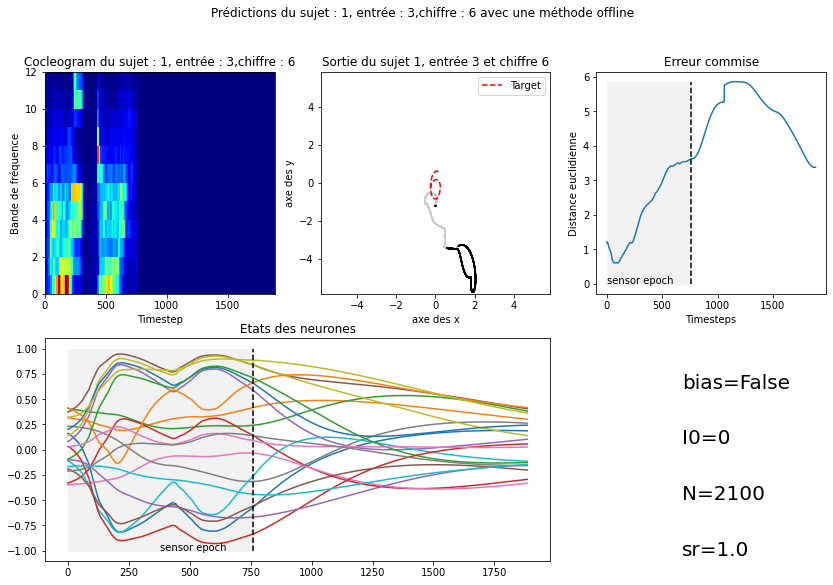

In [11]:
affiche(xyz,indS,indU,indD,data,states,erreur,mode = "offline",sr = sr,N = N,I0=I0,bias = bias)

Pour l'affichage du chiffre, le gris représente la où passe le réservoir sans mettre le stylo sur la feuille, et en noir, la où il écrit.

###### 10 chiffres

In [12]:
#Test du réservoir sur les 10 chiffres:
liste_chiffre=[]
indS, indU = 1,1
for i in range(10):
    X_test = np.transpose(formatage_cocleogram(indS,indU,i,data))
    liste_chiffre.append(esn_offline.run(X_test))

Running Model-0: 1671it [00:02, 804.51it/s]                                                                            
Running Model-0: 970it [00:01, 814.17it/s]                                                                             
Running Model-0: 1512it [00:01, 809.18it/s]                                                                            
Running Model-0: 1790it [00:02, 802.39it/s]                                                                            
Running Model-0: 1295it [00:01, 805.15it/s]                                                                            
Running Model-0: 1931it [00:02, 811.60it/s]                                                                            
Running Model-0: 1886it [00:02, 813.58it/s]                                                                            
Running Model-0: 1395it [00:01, 814.12it/s]                                                                            
Running Model-0: 1566it [00:01, 816.32it

Ensuite on affiche tout les chiffres :

C:\Users\smoot\Desktop\Stage\functions.py:289: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


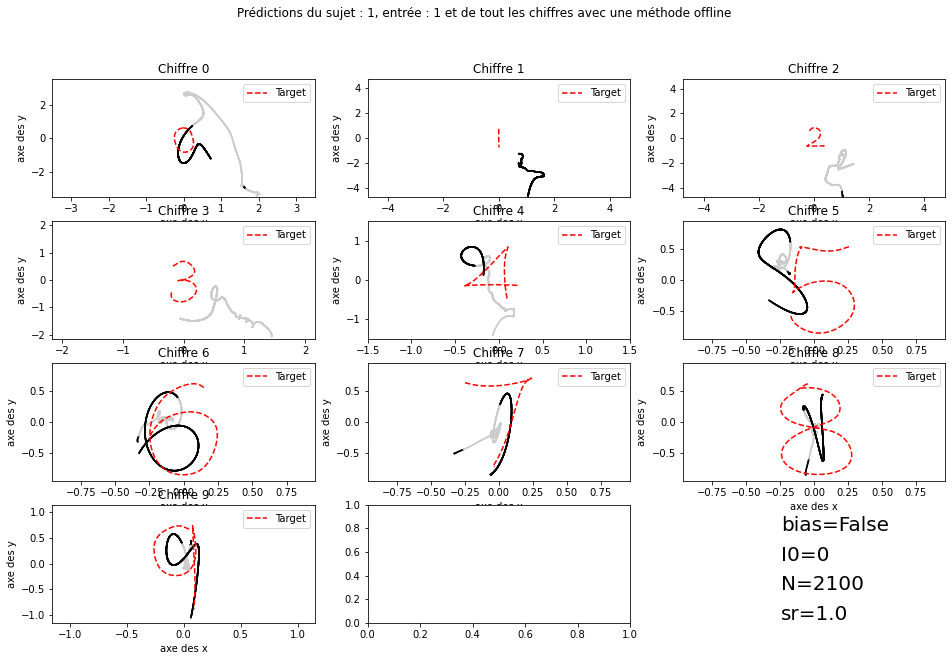

In [13]:
affiche_chiffre(liste_chiffre,indS,indU,data,mode="offline",sr = sr,N=N,I0 = I0,bias=bias)

### Test 2 :

Même principe mais cette fois si ce ne sont pas des données d'entrainement.

###### 1 chiffre

In [14]:
#Test du réservoir
indS,indU,indD = 1,4,6
X_test = np.transpose(formatage_cocleogram(indS,indU,indD,data))
xyz = esn_offline.run(X_test)
   
#Récuperation des états des neurones
states = etat(reservoir_offline,indS,indU,indD,data)

#Récupération de l'erreur commise (distance euclidienne ici)
erreur = error(xyz,indS,indU,indD,data)

Running Model-0: 1919it [00:02, 785.80it/s]                                                                            
Running Reservoir-0: 100%|████████████████████████████████████████████████████████| 1919/1919 [00:02<00:00, 849.47it/s]


Affichage du chiffre

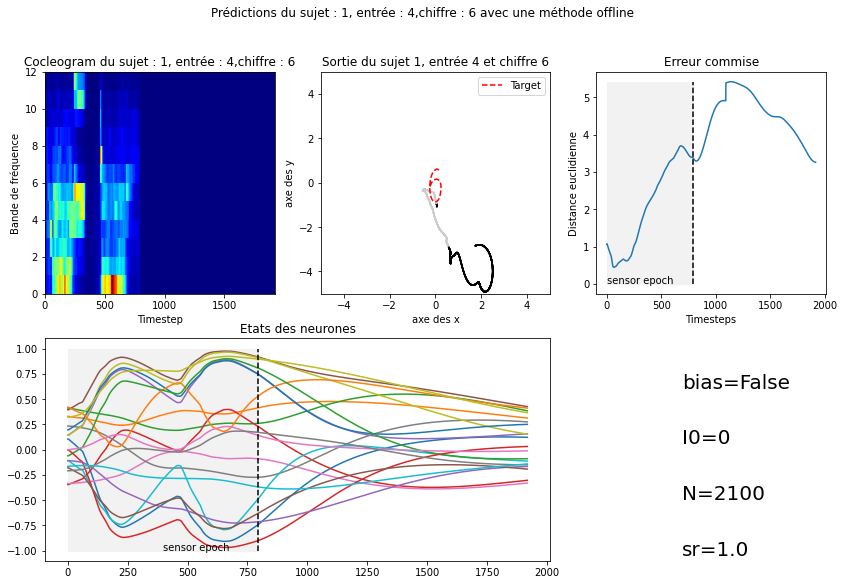

In [15]:
affiche(xyz,indS,indU,indD,data,states,erreur,mode = "offline",sr = sr,N=N,I0 = I0,bias = bias)

###### 10 chiffres

In [16]:
#Test du réservoir sur les 10 chiffres:
liste_chiffre=[]
indS, indU = 1,5
for i in range(10):
    X_test = np.transpose(formatage_cocleogram(indS,indU,i,data))
    liste_chiffre.append(esn_offline.run(X_test))

Running Model-0: 1752it [00:02, 801.60it/s]                                                                            
Running Model-0: 901it [00:01, 807.95it/s]                                                                             
Running Model-0: 1408it [00:01, 802.48it/s]                                                                            
Running Model-0: 1753it [00:02, 813.87it/s]                                                                            
Running Model-0: 1271it [00:01, 810.88it/s]                                                                            
Running Model-0: 1891it [00:02, 810.13it/s]                                                                            
Running Model-0: 1873it [00:02, 804.19it/s]                                                                            
Running Model-0: 1447it [00:01, 811.59it/s]                                                                            
Running Model-0: 1677it [00:02, 814.75it

Affichage du graphique

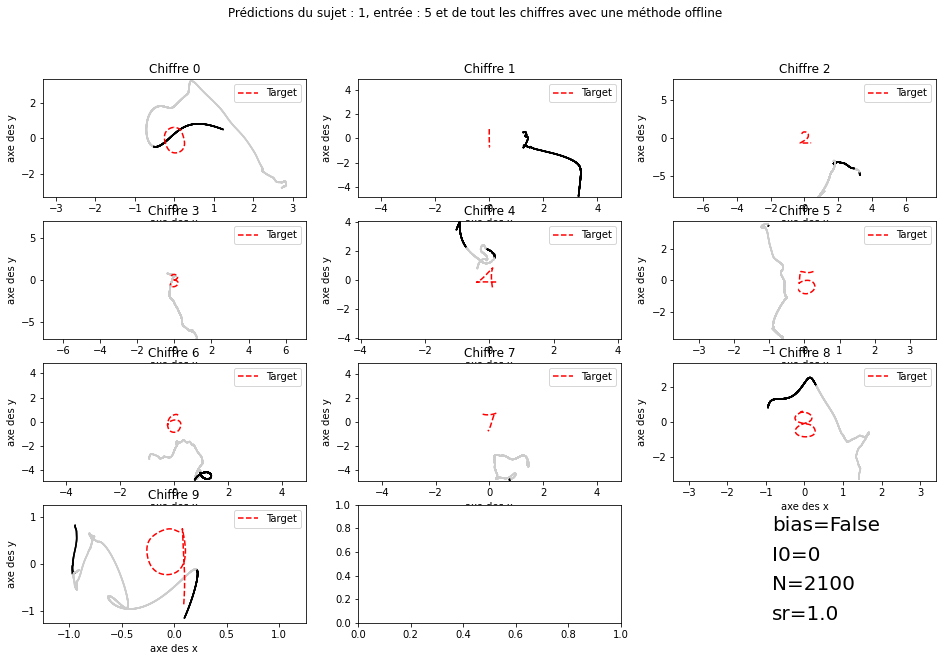

In [17]:
affiche_chiffre(liste_chiffre,indS,indU,data,mode="offline",sr = sr,N=N,I0 = I0,bias=bias)